In [54]:
import pandas as pd
# Zaktualizowanie funkcji load_data o filtr usunięcia wierszy zawierających 'x' lub 'X'

def load_data(file_path):
    # Wczytywanie pliku, zakładając, że jest rozdzielony spacjami/tabulatorami
    df = pd.read_csv(file_path, sep='\s+', header=None, dtype=str)
    
    # Nadanie nazw kolumn
    df.columns = ['chrom1', 'coord1', 'chrom2', 'coord2']
    
    # Usunięcie wierszy, które zawierają 'x' lub 'X'
    df = df[~df.apply(lambda x: 'x' in x.values or 'X' in x.values, axis=1)]
    
    # Konwersja kolumn do odpowiednich typów numerycznych i usunięcie wierszy, które nie zawierają 4 liczb
    for col in ['chrom1', 'coord1', 'chrom2', 'coord2']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna().astype(int)
    
    return df

# Ścieżka do pliku
file_path = 'GSE48262_Th1_bgl_pool.txt'

# Wczytywanie danych
data = load_data(file_path)
data=data.sample(frac=0.01)
# Wyświetlenie wczytanego dataframe
data.head()



,chrom1,coord1,chrom2,coord2
125985,3,147604036,3,149477534
251776,7,68721264,7,69722998
149002,7,140281391,7,148581869
2202416,19,45837336,19,45884630
629079,8,73161364,8,122270973


In [55]:
# Skala dla siatki - to jest przykładowa wartość, może wymagać dostosowania
scale_factor = 100000  # Skala dostosowana do zakresu danych
data['bead1'] = (data['coord1'] // scale_factor).astype(int)
data['bead2'] = (data['coord2'] // scale_factor).astype(int)
data['bead1']=data['bead1']-min(data['bead1'])+1
data['bead2']=data['bead2']-min(data['bead2'])+1
print(max(data['bead1']))

1942


In [56]:
#usuwanie duplikatow
data = data.drop_duplicates(subset=['bead1', 'bead2'], keep=False)
data['sorted_bead_pair'] = data.apply(lambda x: tuple(sorted((x['bead1'], x['bead2']))), axis=1)
data = data.drop_duplicates(subset=['sorted_bead_pair'], keep=False)
data.drop('sorted_bead_pair', axis=1, inplace=True)
data = data[data['bead1'] != data['bead2']]
print(len(data))

16343


In [57]:
print(data)

         chrom1     coord1  chrom2     coord2  bead1  bead2
125985        3  147604036       3  149477534   1447   1465
251776        7   68721264       7   69722998    658    668
149002        7  140281391       7  148581869   1373   1456
629079        8   73161364       8  122270973    702   1193
1031871       1   43475339       1   56053154    405    531
...         ...        ...     ...        ...    ...    ...
787983       15   47733083      15   55917294    448    530
1778635       9    5971672       9   38044889     30    351
1549323      13   20462827      13   29217107    175    263
764723       14   27771932      14   28159420    248    252
688446       10  105293376      10  121113545   1023   1182

[16343 rows x 6 columns]


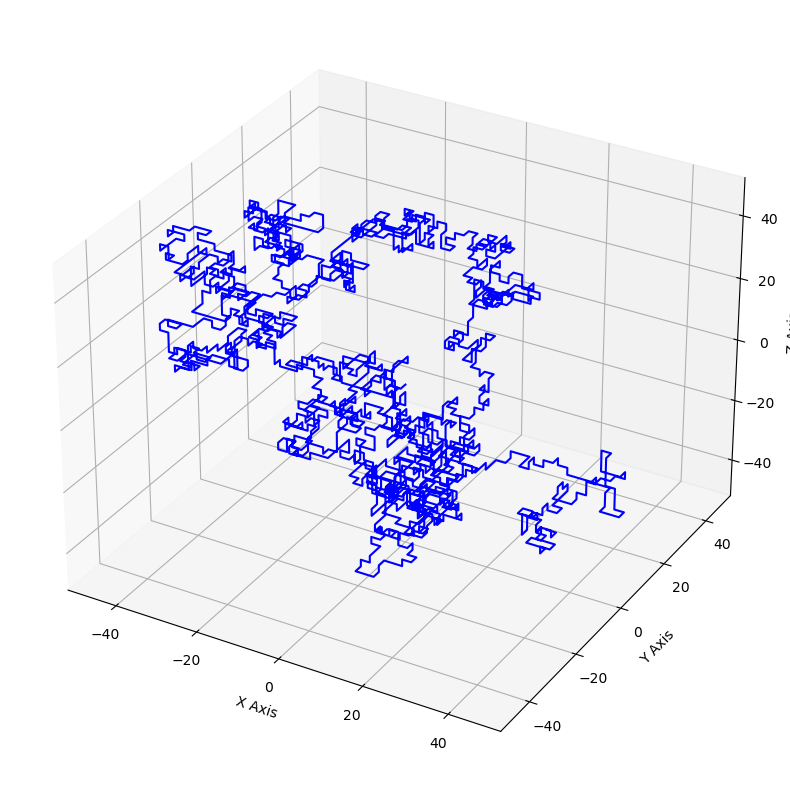

In [117]:
# Zdefiniujemy funkcję, która realizuje self-avoiding walk (SAW) w siatce 3D.
def self_avoiding_walk_3d(steps, grid_size):
    # Początkowa pozycja w środku siatki
    position = np.array([])
    walk = [tuple(position)]
    
    # Potencjalne ruchy
    potential_moves = [np.array(move) for move in [(2, 0, 0), (-2, 0, 0), (0, 2, 0), (0, -2, 0), (0, 0, 2), (0, 0, -2)]]
    
    for _ in range(steps - 1):
        np.random.shuffle(potential_moves)  # Mieszanie możliwych ruchów
        for move in potential_moves:
            new_position = position + move
            if tuple(new_position) not in walk:  # Sprawdzamy, czy nowa pozycja nie była odwiedzona
                position = new_position
                walk.append(tuple(position))
                break
        else:
            # Jeśli żaden ruch nie jest możliwy, kończymy spacer
            break
    
    return walk

# Przeprowadzamy SAW dla 1942 kroków
saw_walk = self_avoiding_walk_3d(steps=1942, grid_size=100)

# Konwertujemy spacer na format, który możemy wyświetlić
x_saw, y_saw, z_saw = zip(*saw_walk)

# Tworzenie wykresu SAW
fig_saw = plt.figure(figsize=(10, 10))
ax_saw = fig_saw.add_subplot(111, projection='3d')
ax_saw.plot(x_saw, y_saw, z_saw, c='blue')

# Ustawiamy etykiety osi
ax_saw.set_xlabel('X Axis')
ax_saw.set_ylabel('Y Axis')
ax_saw.set_zlabel('Z Axis')

# Ustawienie limitów osi
ax_saw.set_xlim(-50, 50)
ax_saw.set_ylim(-50, 50)
ax_saw.set_zlim(-50,50)

# Wyświetlamy wykres SAW
plt.show()



## 

(0,
 -2,
 -2,
 -2,
 -2,
 -2,
 -4,
 -4,
 -6,
 -6,
 -6,
 -6,
 -6,
 -6,
 -6,
 -6,
 -6,
 -6,
 -8,
 -8,
 -10,
 -10,
 -10,
 -10,
 -12,
 -12,
 -12,
 -12,
 -12,
 -12,
 -12,
 -12,
 -10,
 -10,
 -8,
 -8,
 -8,
 -10,
 -10,
 -10,
 -10,
 -10,
 -10,
 -12,
 -12,
 -12,
 -12,
 -12,
 -12,
 -12,
 -12,
 -14,
 -16,
 -18,
 -18,
 -20,
 -20,
 -20,
 -18,
 -16,
 -16,
 -16,
 -16,
 -18,
 -18,
 -20,
 -20,
 -20,
 -20,
 -22,
 -22,
 -22,
 -24,
 -26,
 -28,
 -30,
 -30,
 -32,
 -34,
 -34,
 -34,
 -36,
 -38,
 -38,
 -40,
 -40,
 -40,
 -40,
 -40,
 -40,
 -42,
 -42,
 -42,
 -44,
 -44,
 -44,
 -44,
 -42,
 -42,
 -42,
 -42,
 -44,
 -44,
 -42,
 -42,
 -42,
 -42,
 -44,
 -44,
 -46,
 -46,
 -46,
 -44,
 -44,
 -44,
 -44,
 -46,
 -48,
 -48,
 -48,
 -48,
 -48,
 -50,
 -50,
 -50,
 -50,
 -48,
 -48,
 -46,
 -46,
 -46,
 -46,
 -46,
 -48,
 -48,
 -48,
 -48,
 -48,
 -50,
 -50,
 -50,
 -52,
 -52,
 -50,
 -50,
 -50,
 -50,
 -48,
 -48,
 -50,
 -50,
 -50,
 -48,
 -48,
 -46,
 -44,
 -44,
 -44,
 -42,
 -40,
 -40,
 -40,
 -40,
 -40,
 -40,
 -40,
 -40,
 -40,
 -42,
 -42,
 -42

In [115]:
with open('saw_coordinates.txt', 'w') as file:
    for xi, yi, zi in zip(x_saw, y_saw, z_saw):
        file.write(f"{xi} {yi} {zi}\n")

In [116]:
xx=data['bead1']
xy=data['bead2']
with open('bead_contacts.txt', 'w') as file:
    for xi, yi in zip(xx,xy):
        file.write(f"{xi} {yi}\n")